In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 17.3MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,LSTM,Dropout, GRU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import classification_report, accuracy_score, f1_score 
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Simplilearn_Capstone/Ecommerce/train_data.csv')
df_validation = pd.read_csv('/content/drive/My Drive/Simplilearn_Capstone/Ecommerce/test_data_hidden.csv')
df_test = pd.read_csv('/content/drive/My Drive/Simplilearn_Capstone/Ecommerce/test_data.csv')

In [ ]:
# import nltk
# from string import punctuation
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# #Download Stopwords
# nltk.download('stopwords')

# wordnet_lemmatizer = WordNetLemmatizer()
# tokenizer = RegexpTokenizer(r'[a-z]+')
# stop_words = set(stopwords.words('english'))

# def preprocess(document):
#     document = document.lower() # Convert to lowercase
#     words = tokenizer.tokenize(document) # Tokenize
#     words = [w for w in words if not w in stop_words] # Removing stopwords
#     words = [w for w in words if not w in punctuation]
#     # Lemmatizing
#     for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
#         words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
#     return " ".join(words)


In [ ]:
# df_train['reviews.text'] = df_train['reviews.text'].apply(preprocess)
# df_validation['reviews.text'] = df_validation['reviews.text'].apply(preprocess)
# df_test['reviews.text'] = df_test['reviews.text'].apply(preprocess)

In [ ]:
df_validation['reviews.text'][5]

'This is a great devise for reading books or taking photos. Best Buy Associate was very helpful.'

In [ ]:
df_train.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,3990,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,100,3749


In [ ]:
#merge train and validation sets
df_merged = pd.concat([df_train, df_validation])

In [ ]:
df_merged.shape

(5000, 8)

In [ ]:
df_merged.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
#13 missing items in review title
df_merged.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        13
sentiment             0
dtype: int64

In [ ]:
#group dataframe based on sentiments
df_grouped = df_merged.groupby('sentiment')

In [ ]:
#positive reviews look like
df_grouped.get_group('Positive')['reviews.text'].head(5)

0    Purchased on Black FridayPros - Great Price (e...
1    I purchased two Amazon in Echo Plus and two do...
3    very good product. Exactly what I wanted, and ...
4    This is the 3rd one I've purchased. I've bough...
5    This is a great product. Light weight. I wish ...
Name: reviews.text, dtype: object

In [ ]:
#negative reviews look like
df_grouped.get_group('Negative')['reviews.text'].head(5)

9      was cheap, can not run chrome stuff, returned ...
97     Worthless, except as a regular echo and a poor...
104    Too bad Amazon turned this tablet into a big a...
121    I bought this Kindle for my 7 year old grand-d...
150    I am reading positive reviews and wish I could...
Name: reviews.text, dtype: object

In [ ]:
#neutarl reviews look like
df_grouped.get_group('Neutral')['reviews.text'].head(5)

2     Just an average Alexa option. Does show a few ...
6     My 7-year old daughter saved up to by this. He...
17    Not as good as before the old kindle, just sea...
59    There is nothing spectacular about this item b...
95    It's unfair for me to rate this product cause ...
Name: reviews.text, dtype: object

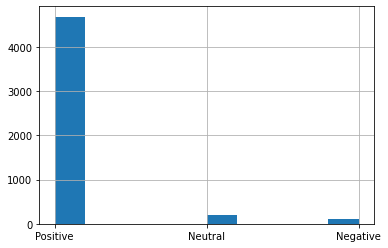

In [ ]:
#plotting class count of each class.From graph we can analyse our daatset is clearly an imbalenced one.it has too many positive reviews and very few other classes
df_merged['sentiment'].hist()

In [ ]:
df_merged['sentiment'].value_counts()

Positive    4686
Neutral      197
Negative     117
Name: sentiment, dtype: int64

In [ ]:
#creating vectorizer object
vectorizer = TfidfVectorizer()
#fit and transform traing reviews into tfidf document term matrics and store in X_data
X_data = vectorizer.fit_transform(df_merged['reviews.text'])
#store target (sentiment) in y_data
y_data = df_merged['sentiment']

In [ ]:
#creating classfier object
multinomial_clf = MultinomialNB()
#train multinomial naive bayes classifier with X_data, y_data
multinomial_clf.fit(X_data, y_data)

MultinomialNB()

In [ ]:
#converting test reviews into tfidf document term matrics.HERE fitting is not done, only transformation is done
test_data_tfidf = vectorizer.transform(df_test['reviews.text'])

In [ ]:
#predict sentiment of test data
predicted_test_sentiment = multinomial_clf.predict(test_data_tfidf)

In [ ]:
#Every review is classified as positive beacuse of the huge class imbalence in the training dataset.Due to taht we dont get accurate results 
np.unique(predicted_test_sentiment)

array(['Positive'], dtype='<U8')

In [ ]:
df_train['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

undersample the dataframes using imblearn library

In [ ]:
#Training Data

#random under sampler object for undersampling the data.(no of sample for each category is given in sampling startegy)
rus_train = RandomUnderSampler(sampling_strategy = {'Positive' : 90, 'Negative' : 90, 'Neutral' : 90}, random_state = 42)
#undersapmle the data with above strategy
data_rus_train,_ = rus_train.fit_resample(df_train, df_train['sentiment'])
#storing into dataframe
underdf_train = pd.DataFrame(data_rus_train)
underdf_train.shape

(270, 8)

In [ ]:
df_validation['sentiment'].value_counts()

Positive    937
Neutral      39
Negative     24
Name: sentiment, dtype: int64

In [ ]:
#Validation data

#random under sampler object for undersampling the data.(no of sample for each category is given in sampling startegy)
rus_val = RandomUnderSampler(sampling_strategy = {'Positive' : 24, 'Negative' : 24, 'Neutral' : 24}, random_state = 42)
#undersapmle the data with above strategy
data_rus_val,_ = rus_val.fit_resample(df_validation, df_validation['sentiment'])
#storing into dataframe
underdf_validation = pd.DataFrame(data_rus_val)
underdf_validation.shape

(72, 8)

In [ ]:
#merged data
#random under sampler object for undersampling the data.(no: of sample for each category is given in sampling startegy)
rus_merged = RandomUnderSampler(sampling_strategy = {'Positive' : 117, 'Negative' : 117, 'Neutral' : 117}, random_state = 42)
#undersapmle the data with above strategy
data_rus_merged,_ = rus_merged.fit_resample(df_merged, df_merged['sentiment'])
#storing into dataframe
underdf_merged = pd.DataFrame(data_rus_merged)
underdf_merged.shape


(351, 8)

In [ ]:
under_train_X, under_test_X, under_train_y,  under_test_y = train_test_split(underdf_merged.drop('sentiment', axis =1), underdf_merged['sentiment'])

oversample the dataset using imblearn library

In [ ]:
#Training Data
#random over sampler object for oversampling the data.(no of sample for each category is given in sampling startegy)
ros_train = RandomOverSampler(sampling_strategy = {'Positive' : 4000, 'Negative' : 4000, 'Neutral' : 4000}, random_state = 42)
#undersapmle the data with above strategy
data_ros_train,_ = ros_train.fit_resample(df_train, df_train['sentiment'])
#storing into dataframe
overdf_train = pd.DataFrame(data_ros_train)
overdf_train.shape

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (4000) in class Positive will be larger than the number of samples in the majority class (class #Positive -> 3749)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (4000) in class Negative will be larger than the number of samples in the majority class (class #Positive -> 3749)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (4000) in class Neutral will be larger than the number of samples in the majority class (class #Positive -> 3749)
  f"After over-sampling, the number of samples ({n_samples})"


(12000, 8)

we dont convert test samples because we dont know the sentiments of test dataset to over sample and under sample

In [ ]:
#validation Data
#random over sampler object for oversampling the data.(no of sample for each category is given in sampling startegy)
ros_val = RandomOverSampler(sampling_strategy = {'Positive' : 1000, 'Negative' : 1000, 'Neutral' : 1000}, random_state = 42)
#undersapmle the data with above strategy
data_ros_val,_ = ros_val.fit_resample(df_validation, df_validation['sentiment'])
#storing into dataframe
overdf_val = pd.DataFrame(data_ros_val)
overdf_val.shape

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1000) in class Positive will be larger than the number of samples in the majority class (class #Positive -> 937)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1000) in class Negative will be larger than the number of samples in the majority class (class #Positive -> 937)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1000) in class Neutral will be larger than the number of samples in the majority class (class #Positive -> 937)
  f"After over-sampling, the number of samples ({n_samples})"


(3000, 8)

In [ ]:
#merged Data
#random over sampler object for oversampling the data.(no of sample for each category is given in sampling startegy)
ros_merged = RandomOverSampler(sampling_strategy = {'Positive' : 5000, 'Negative' : 5000, 'Neutral' : 5000}, random_state = 42)
#undersapmle the data with above strategy
data_ros_merged,_ = ros_merged.fit_resample(df_merged, df_merged['sentiment'])
#storing into dataframe
overdf_merged = pd.DataFrame(data_ros_merged)
overdf_merged.shape

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (5000) in class Positive will be larger than the number of samples in the majority class (class #Positive -> 4686)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (5000) in class Negative will be larger than the number of samples in the majority class (class #Positive -> 4686)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (5000) in class Neutral will be larger than the number of samples in the majority class (class #Positive -> 4686)
  f"After over-sampling, the number of samples ({n_samples})"


(15000, 8)

In [ ]:
over_train_X, over_test_X, over_train_y,  over_test_y = train_test_split(overdf_merged.drop('sentiment', axis =1), overdf_merged['sentiment'])

###Now we've created oversampled and undersampled dataframes.Next train two different models and see the performance

1.Undersampled Random Forest

In [ ]:
def convertTfidf(X, train_bool):
    #fit and transform traing reviews into tfidf document term matrics and store in X_data
    if train_bool == 1:
        X_data = vectorizer.fit_transform(X)
    else:
        X_data = vectorizer.transform(X)
    return X_data

In [ ]:
clf = RandomForestClassifier(max_features='auto')

In [ ]:
clf.fit(convertTfidf(underdf_train['reviews.text'], 1), underdf_train['sentiment'])
pred_underRF = clf.predict(convertTfidf(underdf_validation['reviews.text'], 0))
print('accuracy of under sampled Random Forest model :', accuracy_score(pred_underRF, underdf_validation['sentiment'])*100,'%')
print('F1 score of under sampled Random Forest model :', f1_score(pred_underRF, underdf_validation['sentiment'], average = 'macro'))
print('classification report of undersampled Random Forest Model :\n', classification_report(pred_underRF, underdf_validation['sentiment']))

accuracy of under sampled Random Forest model : 58.333333333333336 %
F1 score of under sampled Random Forest model : 0.5897948088282906
classification report of undersampled Random Forest Model :
               precision    recall  f1-score   support

    Negative       0.62      0.79      0.70        19
     Neutral       0.58      0.47      0.52        30
    Positive       0.54      0.57      0.55        23

    accuracy                           0.58        72
   macro avg       0.58      0.61      0.59        72
weighted avg       0.58      0.58      0.58        72



2.Oversampled Random Forest

In [ ]:
clf.fit(convertTfidf(overdf_train['reviews.text'], 1), overdf_train['sentiment'])
pred_overRF = clf.predict(convertTfidf(overdf_val['reviews.text'], 0))
print('accuracy of over sampled Random Forest model :', accuracy_score(pred_overRF, overdf_val['sentiment'])*100,'%')
print('F1 score of over sampled Random Forest model :', f1_score(pred_overRF, overdf_val['sentiment'], average = 'macro'))
print('classification report of oversampled Random Forest Model :\n', classification_report(pred_overRF, overdf_val['sentiment']))

accuracy of over sampled Random Forest model : 52.03333333333333 %
F1 score of over sampled Random Forest model : 0.4856866822134836
classification report of oversampled Random Forest Model :
               precision    recall  f1-score   support

    Negative       0.30      1.00      0.46       300
     Neutral       0.26      1.00      0.41       261
    Positive       1.00      0.41      0.58      2439

    accuracy                           0.52      3000
   macro avg       0.52      0.80      0.49      3000
weighted avg       0.87      0.52      0.55      3000



3.Under sampled XGBoost Classifier

In [ ]:
xgbclf = XGBClassifier()

In [ ]:
xgbclf.fit(convertTfidf(underdf_train['reviews.text'], 1), underdf_train['sentiment'])
pred_underxgb = xgbclf.predict(convertTfidf(underdf_validation['reviews.text'], 0))
print('accuracy of under sampled XGBoost classifier model :', accuracy_score(pred_underxgb, underdf_validation['sentiment'])*100,'%')
print('F1 score of under sampled XGBoost classifier model :', f1_score(pred_underxgb, underdf_validation['sentiment'], average = 'macro'))
print('classification report of oversampled XGBoost classifier Model :\n', classification_report(pred_underxgb, underdf_validation['sentiment']))

accuracy of under sampled XGBoost classifier model : 58.333333333333336 %
F1 score of under sampled XGBoost classifier model : 0.5845168936048039
classification report of oversampled XGBoost classifier Model :
               precision    recall  f1-score   support

    Negative       0.71      0.74      0.72        23
     Neutral       0.58      0.47      0.52        30
    Positive       0.46      0.58      0.51        19

    accuracy                           0.58        72
   macro avg       0.58      0.59      0.58        72
weighted avg       0.59      0.58      0.58        72



4.Over sampled XGBoost Classifier

In [ ]:
xgbclf.fit(convertTfidf(overdf_train['reviews.text'], 1), overdf_train['sentiment'])
pred_overxgb = xgbclf.predict(convertTfidf(overdf_val['reviews.text'], 0))
print('accuracy of over sampled XGBoost classifier model :', accuracy_score(pred_overxgb, overdf_val['sentiment'])*100,'%')
print('F1 score of over sampled XGBoost classifier model :', f1_score(pred_overxgb, overdf_val['sentiment'], average = 'macro'))
print('classification report of oversampled XGBoost classifier Model :\n', classification_report(pred_overxgb, overdf_val['sentiment']))

accuracy of over sampled XGBoost classifier model : 67.53333333333333 %
F1 score of over sampled XGBoost classifier model : 0.6709711133852582
classification report of oversampled XGBoost classifier Model :
               precision    recall  f1-score   support

    Negative       0.56      0.84      0.67       661
     Neutral       0.59      0.67      0.63       885
    Positive       0.88      0.60      0.72      1454

    accuracy                           0.68      3000
   macro avg       0.68      0.70      0.67      3000
weighted avg       0.72      0.68      0.68      3000



From the above example we can infer that the best performance is by oversampled XGBoost Model with an accuracy of 67.5% and F1 score of 0.67. The next performance is by undersampled random forest classifier with an accuracy of 63.8% and f1 score of 0.643

3. Multiclass SVM

In [ ]:
#Multiclass Support vector classifier
svc = SVC()

Under Sampled SVC model

In [ ]:
svc.fit(convertTfidf(underdf_train['reviews.text'], 1), underdf_train['sentiment'])
pred_undersvc = svc.predict(convertTfidf(underdf_validation['reviews.text'], 0))
print('accuracy of under sampled Support Vector Classifier model :', accuracy_score(pred_undersvc, underdf_validation['sentiment'])*100,'%')
print('F1 score of under sampled Support Vector Classifier model :', f1_score(pred_undersvc, underdf_validation['sentiment'], average = 'macro'))
print('classification report of Support Vector Classifier Model :\n', classification_report(pred_undersvc, underdf_validation['sentiment']))

accuracy of under sampled Support Vector Classifier model : 61.111111111111114 %
F1 score of under sampled Support Vector Classifier model : 0.6154938653953238
classification report of Support Vector Classifier Model :
               precision    recall  f1-score   support

    Negative       0.54      0.72      0.62        18
     Neutral       0.71      0.49      0.58        35
    Positive       0.58      0.74      0.65        19

    accuracy                           0.61        72
   macro avg       0.61      0.65      0.62        72
weighted avg       0.63      0.61      0.61        72



Over sampled SVC model

In [ ]:
svc.fit(convertTfidf(overdf_train['reviews.text'], 1), overdf_train['sentiment'])
pred_oversvc = svc.predict(convertTfidf(overdf_val['reviews.text'], 0))
print('accuracy of over sampled support vector classifier model :', accuracy_score(pred_oversvc, overdf_val['sentiment'])*100,'%')
print('F1 score of oversampled support vector classifier model :', f1_score(pred_oversvc, overdf_val['sentiment'], average = 'macro'))
print('classification report of oversampled support vector classifier Model :\n', classification_report(pred_oversvc, overdf_val['sentiment']))

accuracy of over sampled support vector classifier model : 52.0 %
F1 score of oversampled support vector classifier model : 0.48543981802086195
classification report of oversampled support vector classifier Model :
               precision    recall  f1-score   support

    Negative       0.30      1.00      0.46       300
     Neutral       0.26      1.00      0.41       262
    Positive       1.00      0.41      0.58      2438

    accuracy                           0.52      3000
   macro avg       0.52      0.80      0.49      3000
weighted avg       0.86      0.52      0.55      3000



Here we can see the performance of under sampled svc model is better but it is below the performance of over sampled XGB classifier

We can try some ensemble techniques to improve the performance

1. OVERSAMPLED MNB with boosting





In [ ]:
mnb_boost = AdaBoostClassifier(base_estimator= multinomial_clf)

In [ ]:
mnb_boost.fit(convertTfidf(overdf_train['reviews.text'], 1), overdf_train['sentiment'])
pred_mnb_boost = mnb_boost.predict(convertTfidf(overdf_val['reviews.text'], 0))
print('accuracy of over sampled  multinomial naive bayse model with boosting :', accuracy_score(pred_mnb_boost, overdf_val['sentiment'])*100,'%')
print('F1 score of over sampled  multinomial naive bayse model with boosting:', f1_score(pred_mnb_boost, overdf_val['sentiment'], average = 'macro'))
print('classification report of oversampled  with multinomial naive bayse Model with boosting :\n', classification_report(pred_mnb_boost, overdf_val['sentiment']))

accuracy of over sampled  multinomial naive bayse model with boosting : 62.133333333333326 %
F1 score of over sampled  multinomial naive bayse model with boosting: 0.6155575322734975
classification report of oversampled  with multinomial naive bayse Model with boosting :
               precision    recall  f1-score   support

    Negative       0.46      0.89      0.61       523
     Neutral       0.56      0.56      0.56      1000
    Positive       0.84      0.57      0.68      1477

    accuracy                           0.62      3000
   macro avg       0.62      0.67      0.62      3000
weighted avg       0.68      0.62      0.63      3000



Assigining a feature called sentiment score based on sentiment and check the performance using oversampled XGB and with MNB with boosting

In [ ]:
def assign_sentiment_score(data_frame):
  if data_frame['sentiment'] == 'Positive':
    data_frame['sentiment_score'] = 1
  elif data_frame['sentiment'] == 'Negative':
    data_frame['sentiment_score'] = 0
  else:
    data_frame['sentiment_score'] = 2
  return data_frame


In [ ]:
overdf_train_new = overdf_train.apply(assign_sentiment_score, axis = 1)

In [ ]:
overdf_val_new = overdf_val.apply(assign_sentiment_score, axis = 1)

In [ ]:
overdf_merged_new = overdf_merged.apply(assign_sentiment_score, axis = 1)

1.Oversampled XGBoost with new sentiment score feature

In [ ]:
xgbclf.fit(convertTfidf(overdf_train_new['reviews.text'], 1), overdf_train_new['sentiment_score'])
pred_overxgb_new = xgbclf.predict(convertTfidf(overdf_val_new['reviews.text'], 0))
print('accuracy of over sampled XGBoost classifier with new sentiment score feature :', accuracy_score(pred_overxgb_new, overdf_val_new['sentiment_score'])*100,'%')
print('F1 score of over sampled XGBoost classifier with new sentiment score feature :', f1_score(pred_overxgb_new, overdf_val_new['sentiment_score'], average = 'macro'))
print('classification report of oversampled XGBoost classifier with new sentiment score feature :\n', classification_report(pred_overxgb_new, overdf_val_new['sentiment_score']))

accuracy of over sampled XGBoost classifier with new sentiment score feature : 67.53333333333333 %
F1 score of over sampled XGBoost classifier with new sentiment score feature : 0.6709711133852583
classification report of oversampled XGBoost classifier with new sentiment score feature :
               precision    recall  f1-score   support

           0       0.56      0.84      0.67       661
           1       0.88      0.60      0.72      1454
           2       0.59      0.67      0.63       885

    accuracy                           0.68      3000
   macro avg       0.68      0.70      0.67      3000
weighted avg       0.72      0.68      0.68      3000



2. OVERSAMPLED MNB with boosting with new sentiment score feature

In [ ]:
mnb_boost.fit(convertTfidf(overdf_train_new['reviews.text'], 1), overdf_train_new['sentiment_score'])
pred_mnb_boost = mnb_boost.predict(convertTfidf(overdf_val_new['reviews.text'], 0))
print('accuracy of over sampled  multinomial naive bayse model with boosting with new sentiment score feature :', accuracy_score(pred_mnb_boost, overdf_val_new['sentiment_score'])*100,'%')
print('F1 score of over sampled  multinomial naive bayse model with boosting with new sentiment score feature:', f1_score(pred_mnb_boost, overdf_val_new['sentiment_score'], average = 'macro'))
print('classification report of oversampled  with multinomial naive bayse Model with boosting with new sentiment score feature :\n', classification_report(pred_mnb_boost, overdf_val_new['sentiment_score']))

accuracy of over sampled  multinomial naive bayse model with boosting with new sentiment score feature : 62.133333333333326 %
F1 score of over sampled  multinomial naive bayse model with boosting with new sentiment score feature: 0.6155575322734975
classification report of oversampled  with multinomial naive bayse Model with boosting with new sentiment score feature :
               precision    recall  f1-score   support

           0       0.46      0.89      0.61       523
           1       0.84      0.57      0.68      1477
           2       0.56      0.56      0.56      1000

    accuracy                           0.62      3000
   macro avg       0.62      0.67      0.62      3000
weighted avg       0.68      0.62      0.63      3000



From the evaluation we can find that there is no much improvement using the new sentiment score feature.

### we can now try LSTMs to check for further improvemets

In [ ]:
top_words = 10000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(overdf_merged_new['reviews.text'].values)
list_tokenized_train = tokenizer.texts_to_sequences(overdf_merged_new['reviews.text'].values)

max_len = 1000
X_train_data = pad_sequences(list_tokenized_train, maxlen= max_len, padding = 'pre')
y_train_data = overdf_merged_new['sentiment_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.33, random_state=42)

In [ ]:
y_train_dummy =  pd.get_dummies(y_train).values

In [ ]:
embedding_vector_len = 128
def model_create(optimizer = 'adam'):
  model = Sequential()
  model.add(Embedding(top_words+1, embedding_vector_len, input_length = max_len))
  model.add(LSTM(100))
  model.add(Dense(3, activation= 'softmax'))
  model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
  model.summary()
  return model

In [ ]:
model = model_create()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 128)         1280128   
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               91600     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 303       
Total params: 1,372,031
Trainable params: 1,372,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train_dummy, epochs=2, batch_size=64, validation_split=0.3)

Epoch 1/2
110/110 [==============================] - 11s 85ms/step - loss: 0.9209 - accuracy: 0.5883 - val_loss: 0.1877 - val_accuracy: 0.9463
Epoch 2/2
110/110 [==============================] - 9s 81ms/step - loss: 0.1043 - accuracy: 0.9692 - val_loss: 0.1233 - val_accuracy: 0.9662


In [ ]:
# list_tokenized_val = tokenizer.texts_to_sequences(overdf_val_new['reviews.text'].values)
# X_val =  pad_sequences(list_tokenized_val, maxlen= max_len, padding = 'pre')
# y_val = overdf_val_new['sentiment_score']
# y_val_dummies = pd.get_dummies(y_val).values

In [ ]:
y_val_dummies = pd.get_dummies(y_test).values

In [ ]:
score = model.evaluate(X_test, y_val_dummies, batch_size = 64)

78/78 [==============================] - 2s 28ms/step - loss: 0.1225 - accuracy: 0.9665


In [ ]:
pred = model.predict(X_test)
pred_values = np.argmax(pred, axis=1)
np.unique(pred_values, return_counts= True)

(array([0, 1, 2]), array([1696, 1520, 1734]))

In [ ]:
accuracy_score(pred_values, y_test)

0.9664646464646465

In [ ]:
f1_score(y_test, pred_values, average = 'micro')

0.9664646464646465

Comparing with other machine learning models we can see a better accuracy of 96% and a better f1 score of 0.96 with LSTM. so we can  clearly sate that LSTM is far better than traditional ML algorithms.

## Grid Search for best parameters for LSTM Model

In [ ]:
model = KerasClassifier(build_fn=model_create)
optimizers = ('rmsprop', 'adam')
epochs = (1, 2, 3)
batches = (32, 64, 128)
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train,y_train_dummy)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 128)         1280128   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               91600     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 1,372,031
Trainable params: 1,372,031
Non-trainable params: 0
_________________________________________________________________
63/63 [==============================] - 2s 20ms/step - loss: 0.1213 - accuracy: 0.9557
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 128)         1280128   
_________________________________________________________________
ls

From the above grid search we can understand the model best perfrormed with parameters 'batch_size': 64, 'epochs': 3, 'optimizer': 'adam with an accuracy of 98%.

We can try Random search Now.

In [ ]:
model = KerasClassifier(build_fn=model_create)
optimizers = ('rmsprop', 'adam')
epochs = (1, 2, 3)
batches = (32, 64, 128)
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
randomcv = RandomizedSearchCV(estimator=model, param_distributions=param_grid)
random_result = randomcv.fit(X_train,y_train_dummy)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Model: "sequential_551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_551 (Embedding)    (None, 1000, 128)         1280128   
_________________________________________________________________
lstm_557 (LSTM)              (None, 100)               91600     
_________________________________________________________________
dense_551 (Dense)            (None, 3)                 303       
Total params: 1,372,031
Trainable params: 1,372,031
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
252/252 [==============================] - 16s 57ms/step - loss: 0.7486 - accuracy: 0.6789
Epoch 2/3
252/252 [==============================] - 14s 56ms/step - loss: 0.0596 - accuracy: 0.9862
Epoch 3/3
63/63 [==============================] - 2s 19ms/step - loss: 0.0391 - accuracy: 0.9876
Model: "sequential_552"
________________________________________________

from random search CV we can understand the best LSTM model with params 'optimizer': 'adam', 'epochs': 3, 'batch_size': 32.

### we can now go for GRUs

In [ ]:
embedding_vector_len = 128
def model_create_GRU(optimizer = 'adam'):
  model = Sequential()
  model.add(Embedding(top_words+1, embedding_vector_len, input_length = max_len))
  model.add(GRU(100))
  model.add(Dense(3, activation= 'softmax'))
  model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
  model.summary()
  return model

In [ ]:
y_train_dummy =  pd.get_dummies(y_train).values

In [ ]:
model = model_create_GRU()

Model: "sequential_602"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_602 (Embedding)    (None, 1000, 128)         1280128   
_________________________________________________________________
gru (GRU)                    (None, 100)               69000     
_________________________________________________________________
dense_602 (Dense)            (None, 3)                 303       
Total params: 1,349,431
Trainable params: 1,349,431
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train_dummy, epochs=2, batch_size=64, validation_split=0.3)

Epoch 1/2
110/110 [==============================] - 10s 76ms/step - loss: 0.8273 - accuracy: 0.6656 - val_loss: 0.2504 - val_accuracy: 0.9184
Epoch 2/2
110/110 [==============================] - 8s 72ms/step - loss: 0.1388 - accuracy: 0.9605 - val_loss: 0.0622 - val_accuracy: 0.9834


In [ ]:
y_val_dummies = pd.get_dummies(y_test).values

In [ ]:
pred = model.predict(X_test)
pred_values = np.argmax(pred, axis=1)
np.unique(pred_values, return_counts= True)

(array([0, 1, 2]), array([1642, 1610, 1698]))

In [ ]:
accuracy_score(pred_values, y_test)

0.9846464646464647

In [ ]:
f1_score(y_test, pred_values, average = 'micro')

0.9846464646464647

With GRUs of same specification we can attain better performance than LSTM. around 0.2 higher F1 score

## GRUs and GridSearch CV

In [ ]:
model = KerasClassifier(build_fn=model_create_GRU)
optimizers = ('rmsprop', 'adam')
epochs = (1, 2, 3)
batches = (32, 64, 128)
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train,y_train_dummy)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Model: "sequential_603"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_603 (Embedding)    (None, 1000, 128)         1280128   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               69000     
_________________________________________________________________
dense_603 (Dense)            (None, 3)                 303       
Total params: 1,349,431
Trainable params: 1,349,431
Non-trainable params: 0
_________________________________________________________________
63/63 [==============================] - 2s 19ms/step - loss: 0.1430 - accuracy: 0.9502
Model: "sequential_604"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_604 (Embedding)    (None, 1000, 128)         1280128   
______________________________________________________________

The best params for GRU from gridsearchCV are 'batch_size': 64, 'epochs': 3, 'optimizer': 'adam' with an accuracy of 99%

## GRU and RandomSearchCV

In [ ]:
model = KerasClassifier(build_fn=model_create_GRU)
optimizers = ('rmsprop', 'adam')
epochs = (1, 2, 3)
batches = (32, 64, 128)
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
randomcv = RandomizedSearchCV(estimator=model, param_distributions=param_grid)
random_result = randomcv.fit(X_train,y_train_dummy)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Model: "sequential_694"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_694 (Embedding)    (None, 1000, 128)         1280128   
_________________________________________________________________
gru_92 (GRU)                 (None, 100)               69000     
_________________________________________________________________
dense_694 (Dense)            (None, 3)                 303       
Total params: 1,349,431
Trainable params: 1,349,431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
126/126 [==============================] - 9s 58ms/step - loss: 0.8107 - accuracy: 0.6747
Epoch 2/3
126/126 [==============================] - 7s 57ms/step - loss: 0.1079 - accuracy: 0.9672
Epoch 3/3
32/32 [==============================] - 1s 24ms/step - loss: 0.0515 - accuracy: 0.9871
Model: "sequential_695"
__________________________________________________

The best params for GRU from gridsearchCV are 'batch_size': 64, 'epochs': 3, 'optimizer': 'adam' with an accuracy of 99%, same as that of found from GridsearchCV

## F1 score of best model

In [ ]:
model = model_create_GRU('adam')
model.fit(X_train,y_train_dummy, epochs=3, batch_size=64, validation_split=0.3)

Model: "sequential_745"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_745 (Embedding)    (None, 1000, 128)         1280128   
_________________________________________________________________
gru_143 (GRU)                (None, 100)               69000     
_________________________________________________________________
dense_745 (Dense)            (None, 3)                 303       
Total params: 1,349,431
Trainable params: 1,349,431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
110/110 [==============================] - 10s 77ms/step - loss: 0.8517 - accuracy: 0.6486 - val_loss: 0.1643 - val_accuracy: 0.9376
Epoch 2/3
110/110 [==============================] - 8s 72ms/step - loss: 0.0995 - accuracy: 0.9673 - val_loss: 0.0583 - val_accuracy: 0.9821
Epoch 3/3
110/110 [==============================] - 8s 72ms/step - loss: 0.0132 - accu

In [ ]:
y_val_dummies = pd.get_dummies(y_test).values

In [ ]:
pred = model.predict(X_test)
pred_values = np.argmax(pred, axis=1)
np.unique(pred_values, return_counts= True)

(array([0, 1, 2]), array([1638, 1649, 1663]))

In [ ]:
f1_score(y_test, pred_values, average = 'macro')

0.9925541635357927

## The Best model f1 score is 0.99

# Clustering and Topic Modelling

## 1. NMF

In [ ]:
X = convertTfidf(df_merged['reviews.text'],1)

In [ ]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [ ]:
# we craeate a dataframe consisiting component matrix where rows are topis and columna are words 
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())
components_df.head()

,00,10,100,1000,1000s,105,1080,10th,10x,11,11yr,12,120,128,128gb,129,13,139,13th,14,149,15,150,15mins,16,16g,16gb,17,18,180,19,199,1gb,1gig,1st,1week,1yr,20,200,2003,...,youngsters,your,yours,yourself,youth,youtube,yr,yrs,zero,zigbee,zinio,zippy,zone,zoo,zooms,äãis,äî,äîand,äîbadly,äîespecially,äò,äôd,äôll,äôm,äôre,äôs,äôt,äôve,äù,äùcrestron,äú,äúalexa,äúbest,äúdropping,äúdual,äúshow,äúskills,äústar,äúthings,ôºå
0,0.000653,0.010013,0.007091,0.000449,0.000000,0.000277,0.0,0.004938,0.004989,0.000000,0.0,0.000000,0.0,0.002275,0.003596,0.000221,0.000000,0.000618,0.0000,0.000000,0.001526,0.001142,0.007226,0.000000,0.0,0.000000,0.013083,0.000112,0.000000,0.000618,0.000112,0.002943,0.001587,0.001246,0.009042,0.003074,0.000000,0.0,0.00461,0.00000,...,0.000000,0.000000,0.000000,0.002269,0.000000,0.026808,0.000000,0.0,0.000000,0.001207,0.000398,0.001432,0.002549,0.0,0.000000,0.000000,0.000000,0.000142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.003224,0.000000,0.000000,0.002227,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.002952,0.002380
1,0.000000,0.001385,0.000000,0.001580,0.000000,0.000000,0.0,0.004591,0.000000,0.000000,0.0,0.005807,0.0,0.000000,0.000000,0.000000,0.003836,0.000000,0.0048,0.009583,0.000000,0.004753,0.000000,0.000829,0.0,0.000000,0.005582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.00205,...,0.000000,0.000000,0.011106,0.000000,0.000000,0.000000,0.029383,0.0,0.001545,0.000000,0.000000,0.000000,0.001235,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.003412,0.000000,0.002407,0.000000,0.005291,0.004298,0.000000,0.000000,0.0,0.00000,0.0,0.000166,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,...,0.003733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.002012,0.000000,0.000098,0.000032,0.000000,0.0,0.000000,0.006059,0.000000,0.000000,0.000245,0.000000,0.000000,0.002349,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000491,0.000000,0.000000,0.000472,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.004816
3,0.003620,0.009417,0.006381,0.001048,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000728,0.000000,0.000532,0.000000,0.0,0.009077,0.000807,0.000000,0.000000,0.000000,0.000000,0.000213,0.000000,0.000000,0.000000,0.000000,0.002143,0.0,0.00000,0.00000,...,0.000133,0.029651,0.000000,0.000000,0.000000,0.000000,0.002549,0.0,0.000000,0.000000,0.000877,0.000000,0.000000,0.0,0.002481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.017210,0.000000,0.000000,0.002686,0.000000,0.000000,0.000000,0.002513,0.000786,0.0,0.00155,0.0,0.001256,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.001795,0.002682,0.000000,0.0,0.000000,0.000000,0.002865,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.005197,0.000000,0.0000,0.000000,0.001880,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001038,0.000000,0.000000,0.001038,0.000000,0.000000,0.000000,0.013501,0.000000,0.000609,0.0,0.00000,0.00000,...,0.000000,0.145424,0.000000,0.000000,0.000175,0.059707,0.000000,0.0,0.000000,0.007295,0.000000,0.000000,0.000160,0.0,0.000000,0.000000,0.005087,0.002289,0.003684,0.001767,0.001212,0.009192,0.004955,0.058569,0.00389,0.149223,0.063256,0.037305,0.021518,0.001324,0.003554,0.007927,0.000428,0.001822,0.0,0.00311,0.0,0.004064,0.004826,0.000000


In [ ]:
# we are printing each topics and most prominant words
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
the       2.793418
is        1.807391
tablet    0.638796
of        0.630557
screen    0.530470
and       0.502338
good      0.473233
this      0.471479
best      0.270989
on        0.270647
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
she              1.676093
her              0.882056
loves            0.853173
daughter         0.622799
it               0.580370
my               0.487660
granddaughter    0.292102
wife             0.245104
bought           0.197878
for              0.183411
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
easy       1.569314
to         1.283607
use        1.282306
very       0.662073
and        0.480909
set        0.467554
up         0.444970
is         0.167442
product    0.154283
setup      0.109797
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
great        2.057955
product      0.683123
works        0.624009
price 

## 2. LDA

In [ ]:
#importing libraries
import string
import spacy
from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")

#function to preprocess the input text
def preprocessText(text):

    #spacy tokenizer
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    # splitting on basis of fullstop and joining together 
    # because sometimes spacy tockenizer didnot split when no space between fullstop and next word
    text = ' '.join(text.split('.'))
    # spacy tokenizer
    tokens = nlp(text)
    lemma_list = []
    processed_words = []
    #appending lemmatized words into lemma_list
    for token in tokens:
      lemma_list.append(token.lemma_)
    # append lemmatized words other than punctuations in processed words
    for word in lemma_list:
        if word not in string.punctuation:
            processed_words.append(word)
    # return final words set
    return list(processed_words)

In [ ]:
lda_data = df_merged['reviews.text'].apply(preprocessText)

In [ ]:
from gensim import corpora, models

In [ ]:
#creating word to id dictionary 
dictionary = corpora.Dictionary(lda_data)

In [ ]:
#Transform collection of words into numeric form
corpus = [dictionary.doc2bow(text) for text in lda_data]

In [ ]:
#build lda model
lda_model = models.LdaModel(corpus = corpus, id2word =dictionary, num_topics = 10)

In [ ]:
for idx in range(10):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))

Topic #0: 0.068*"-PRON-" + 0.042*"be" + 0.038*" " + 0.026*"good" + 0.024*"this" + 0.021*"very" + 0.020*"and" + 0.019*"the" + 0.018*"great" + 0.017*"product"
Topic #1: 0.051*"-PRON-" + 0.045*" " + 0.040*"be" + 0.035*"and" + 0.031*"the" + 0.025*"a" + 0.020*"as" + 0.017*"not" + 0.016*"to" + 0.013*"use"
Topic #2: 0.139*"-PRON-" + 0.040*"the" + 0.037*" " + 0.026*"be" + 0.023*"have" + 0.018*"and" + 0.012*"love" + 0.011*"to" + 0.011*"a" + 0.010*"of"
Topic #3: 0.079*"-PRON-" + 0.046*" " + 0.045*"to" + 0.026*"a" + 0.023*"the" + 0.022*"be" + 0.019*"and" + 0.017*"have" + 0.017*"of" + 0.014*"for"
Topic #4: 0.078*"-PRON-" + 0.060*"be" + 0.044*"to" + 0.044*"the" + 0.043*" " + 0.024*"and" + 0.016*"for" + 0.015*"a" + 0.015*"this" + 0.015*"have"
Topic #5: 0.113*"-PRON-" + 0.053*"be" + 0.042*" " + 0.037*"the" + 0.030*"a" + 0.028*"and" + 0.026*"for" + 0.022*"tablet" + 0.019*"this" + 0.019*"have"
Topic #6: 0.091*"-PRON-" + 0.072*"the" + 0.046*" " + 0.040*"to" + 0.035*"be" + 0.027*"and" + 0.018*"a" + 0.012

From the topic modelling we can understand the topics most people talk about phone is about
1. screen
2. giving as a gift
3. easeness of use
4. price
5. alexa
6. music
7. kindle and reading etc